In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [2]:
import pandas as pd
df = pd.read_csv('./WELFake_Dataset.csv')
df.head()


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [3]:
df = df.drop('Unnamed: 0', axis = 1)
df.dropna(inplace = True)


# pre-processing

In [4]:
#removing other than alphates and digits
import re
df['title'] = df['title'].str.replace(r"[^\w\s]", "").str.replace(r"\d", "")
df['text'] = df['text'].str.replace(r"[^\w\s]","").str.replace(r"\d", "")
df.head()


,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [5]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
nltk.download('punkt')

# Function to tokenize and remove stopwords from text
def tokenize_and_remove_stopwords(text):
    # Convert the text to lowercase to ensure consistency
    text = text.lower()

    # Get the set of English stopwords from NLTK
    stop_words = set(stopwords.words('english'))

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stopwords from the list of tokens
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Reconstruct the text by joining the remaining tokens
    filtered_text = " ".join(filtered_tokens)

    return filtered_text





[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nhatanh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nhatanh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# Apply the function to the 'text_column' and create a new column 'filtered_text_column'
df['title'] = df['title'].apply(tokenize_and_remove_stopwords)
df['text'] = df['text'].apply(tokenize_and_remove_stopwords)
df.head()


,title,text,label
0,law enforcement high alert following threats c...,comment expected barack obama members # fyf911...,1
2,unbelievable ! obama ’ attorney general says c...,", demonstrators gathered last night exercising...",1
3,"bobby jindal , raised hindu , uses story chris...",dozen politically active pastors came private ...,0
4,satan 2 : russia unvelis image terrifying new ...,"rs-28 sarmat missile , dubbed satan 2 , replac...",1
5,time ! christian group sues amazon splc design...,say one time someone sued southern poverty law...,1


In [7]:
import numpy as np
X = df['title'] + df['text']
y = df['label']


In [8]:
df.head()


,title,text,label
0,law enforcement high alert following threats c...,comment expected barack obama members # fyf911...,1
2,unbelievable ! obama ’ attorney general says c...,", demonstrators gathered last night exercising...",1
3,"bobby jindal , raised hindu , uses story chris...",dozen politically active pastors came private ...,0
4,satan 2 : russia unvelis image terrifying new ...,"rs-28 sarmat missile , dubbed satan 2 , replac...",1
5,time ! christian group sues amazon splc design...,say one time someone sued southern poverty law...,1


In [9]:
print(X)


0        law enforcement high alert following threats c...
2        unbelievable ! obama ’ attorney general says c...
3        bobby jindal , raised hindu , uses story chris...
4        satan 2 : russia unvelis image terrifying new ...
5        time ! christian group sues amazon splc design...
                               ...                        
72129    russians steal research trump hack u.s. democr...
72130    watch : giuliani demands democrats apologize t...
72131    migrants refuse leave train refugee camp hunga...
72132    trump tussle gives unpopular mexican leader mu...
72133    goldman sachs endorses hillary clinton preside...
Length: 71537, dtype: object


In [10]:
print(y)


0        1
2        1
3        0
4        1
5        1
        ..
72129    0
72130    1
72131    0
72132    0
72133    1
Name: label, Length: 71537, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.15, random_state = 42)


In [12]:
max_words = 10000 # total number of words in the dictionary
max_len = 1000 # length of each sentence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

tokenizer= Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Step 2: Get the total number of words in the vocabulary
total_words = len(tokenizer.word_index)

# Step 3: Get the occurrences of each word
word_counts = tokenizer.word_counts


2025-11-28 16:01:59.061833: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-28 16:01:59.152877: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764320519.188951  245652 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764320519.200141  245652 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764320519.268760  245652 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [13]:
print(X_train.info())


<class 'pandas.core.series.Series'>
Index: 60806 entries, 31206 to 15897
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
60806 non-null  object
dtypes: object(1)
memory usage: 950.1+ KB
None


In [14]:

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = sequence.pad_sequences(training_sequences,maxlen=max_len)

test_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = sequence.pad_sequences(test_sequences,maxlen=max_len)


In [15]:
# creating the dictionary having words as keys and corr vector as values of words which are in glove
embeddings_index = dict()
f = open('glove.6B.100d.txt', encoding = "utf8")
for line in f:
    values = line.split() #breaking each line into word and number (each line has first word then numbers representing that vector)
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
print (len(embeddings_index))
f.close()


400000


In [16]:
embedding_matrix = np.zeros((max_words, 100))
for word, index in tokenizer.word_index.items():
    if index > max_words - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
print (embedding_matrix)


[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.026284    0.017938   -0.50164998 ... -0.86879998  0.94094002
  -0.28815001]
 [-0.042568   -0.084246   -0.33094999 ... -0.92315     0.012559
   0.21473999]
 ...
 [-0.30752999  0.28876001  0.64822    ... -0.47023001  0.39616001
   0.56001002]
 [ 0.14132001 -0.54245001 -0.92558998 ...  1.5359      0.25397
  -0.75093001]
 [-0.014626    0.16706    -0.24719    ...  0.055947   -0.24697
   0.1191    ]]


In [17]:
print(type(y_train))


<class 'pandas.core.series.Series'>


In [18]:
y_train = y_train.values
y_test = y_test.values


In [19]:
print(training_padded.shape)
print(y_train.shape)
print(testing_padded.shape)
print(y_test.shape)


(60806, 1000)
(60806,)
(10731, 1000)
(10731,)


In [36]:
# from tensorflow import keras
# from tensorflow.keras import layers

# CONSISTENT IMPORTS
import tf_keras as keras
from tf_keras import layers

num_classes = 1  # Replace this with the actual number of classes in your dataset

# Define the custom embedding layer using the embedding_matrix
embedding_layer = layers.Embedding(
    max_words,
    100,
    weights=[embedding_matrix],  # Pass the embedding_matrix as the weights
    input_length=max_len,
    trainable=False  # Set trainable to False to keep the pre-trained embeddings fixed
)

model_3 = keras.Sequential([
    embedding_layer,  # Use the custom embedding layer here
    layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    layers.BatchNormalization(),
    layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2, strides=2, padding='valid'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')  # Output layer with the correct number of classes
])



In [37]:
# Compile the model with an appropriate loss function and optimizer
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3.summary()

hist = model_3.fit(training_padded, y_train, validation_data=(testing_padded, y_test), batch_size=20, epochs=40, verbose=2)
accr = model_3.evaluate(testing_padded, y_test, verbose=0)
print('Test Accuracy', accr[1])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         1000000   
                                                                 
 conv1d_2 (Conv1D)           (None, 998, 32)           9632      
                                                                 
 batch_normalization_3 (Bat  (None, 998, 32)           128       
 chNormalization)                                                
                                                                 
 conv1d_3 (Conv1D)           (None, 996, 32)           3104      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 498, 32)           0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 15936)            

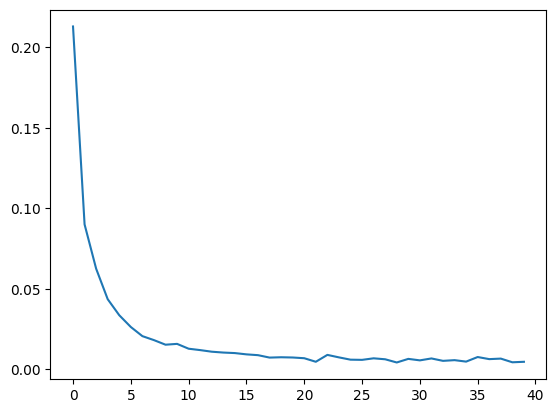

In [38]:
import pandas as pd

history_df = pd.DataFrame(hist.history)
history_df['loss'].plot();


# cnn + lstm

In [39]:
# from tensorflow import keras
# from tensorflow.keras import layers

# CONSISTENT IMPORTS
import tf_keras as keras
from tf_keras import layers # <--- CORRECT! Use the legacy layers


num_classes = 1  # Replace this with the actual number of classes in your dataset

# Define the custom embedding layer using the embedding_matrix
embedding_layer = layers.Embedding(
    max_words,
    100,
    weights=[embedding_matrix],  # Pass the embedding_matrix as the weights
    input_length=max_len,
    trainable=False  # Set trainable to False to keep the pre-trained embeddings fixed
)

model_4 = keras.Sequential([
    embedding_layer,
    layers.BatchNormalization(),
    layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size=2, strides=2, padding='valid'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2, strides = 2, padding = 'valid'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.LSTM(units = 64),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')

])


In [40]:
model_4.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy'],

)


In [41]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

model_4.summary()

history = model_4.fit(training_padded, y_train, validation_data=(testing_padded, y_test),
                      batch_size=20, epochs=20, verbose=2,callbacks = [early_stopping], )


accr = model_4.evaluate(testing_padded, y_test, verbose=0)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 100)         1000000   
                                                                 
 batch_normalization_4 (Bat  (None, 1000, 100)         400       
 chNormalization)                                                
                                                                 
 conv1d_4 (Conv1D)           (None, 998, 32)           9632      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 499, 32)           0         
 g1D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 499, 32)           0         
                                                                 
 batch_normalization_5 (Bat  (None, 499, 32)          

<Axes: title={'center': 'Accuracy'}>

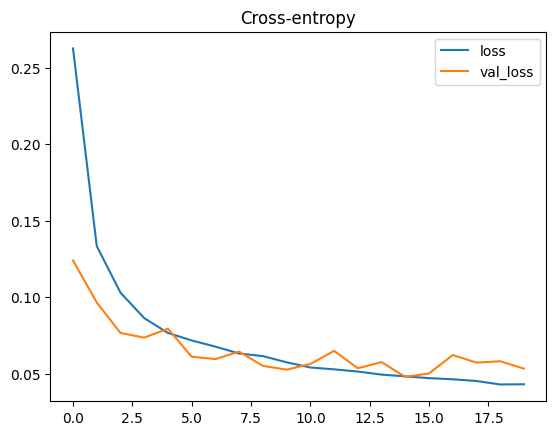

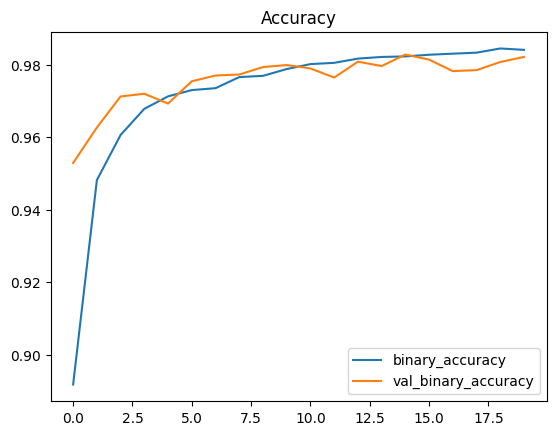

In [42]:
from matplotlib.pyplot import plot
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")


In [45]:
# # from tensorflow import keras
# # from tensorflow.keras import layers

# # CONSISTENT IMPORTS
# import tf_keras as keras
# from tf_keras import layers

# num_classes = 1  # Replace this with the actual number of classes in your dataset

# # Define the custom embedding layer using the embedding_matrix
# # Define the input layer
# input_layer = layers.Input(shape=(max_len,), dtype='int32')

# embedding_layer = layers.Embedding(
#     max_words,
#     100,
#     weights=[embedding_matrix],  # Pass the embedding_matrix as the weights
#     input_length=max_len,
#     trainable=False  # Set trainable to False to keep the pre-trained embeddings fixed
# )

# # Get the embedding output
# embedded_sequences = embedding_layer(input_layer)


# # First 1D-CNN block
# cnn1 = layers.Conv1D(128, kernel_size=3, activation='relu')(embedded_sequences)
# maxpool1 = layers.MaxPooling1D(pool_size=2)(cnn1)

# # Second 1D-CNN block
# cnn2 = layers.Conv1D(128, kernel_size=4, activation='relu')(embedded_sequences)
# maxpool2 = layers.MaxPooling1D(pool_size=2)(cnn2)

# # Third 1D-CNN block
# cnn3 = layers.Conv1D(128, kernel_size=5, activation='relu')(embedded_sequences)
# maxpool3 = layers.MaxPooling1D(pool_size=2)(cnn3)

# # Concatenate the outputs of the three 1D-CNN blocks
# concatenated_layers = layers.concatenate([maxpool1, maxpool2, maxpool3])

# # Max-pooling layer to further reduce vector dimension
# maxpool_combined = layers.MaxPooling1D(pool_size=5)(concatenated_layers)

# # Convolution layer after concatenation
# conv_combined = layers.Conv1D(128, kernel_size=5, activation='relu')(maxpool_combined)

# # Two hidden layers
# hidden1 = layers.Dense(384, activation='relu')(conv_combined)
# hidden2 = layers.Dense(128, activation='relu')(hidden1)

# # Output layer
# output_layer = layers.Dense(num_classes, activation='sigmoid')(hidden2)



In [48]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # 1. Initialize the base estimator
# base_estimator = DecisionTreeClassifier(max_depth=3)

# # 2. Use 'estimator' instead of 'base_estimator'
# model_ad = AdaBoostClassifier(
#     estimator=base_estimator,  # <--- CHANGED HERE
#     n_estimators=50,
#     random_state=42
# )

# model_ad.fit(X_train, y_train)
# y_pred = model_ad.predict(X_test)

# print(accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [49]:
# # Create the model
# model = models.Model(inputs=input_layer, outputs=output_layer)

# # Compile the model with appropriate optimizer and loss function
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print the model summary
# model.summary()


# using PCA (Principal component analysis)

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your input data (replace it with your actual data)
# Apply standardization to scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(embedding_matrix)


# After creating the embedding_matrix, apply PCA to reduce the dimensionality
pca = PCA(n_components=0.95)  # Set the number of components you want to keep (e.g., 50)
embedding_matrix_pca = pca.fit_transform(scaled_data)

#get the actual number of components after pca
num_components = pca.n_components_
print(num_components)




82


In [52]:
# from tensorflow import keras
# from tensorflow.keras import layers

# CONSISTENT IMPORTS
import tf_keras as keras
from tf_keras import layers

num_classes = 1  # Replace this with the actual number of classes in your dataset

# Replace the original embedding_matrix with the PCA-transformed embedding_matrix
embedding_layer = layers.Embedding(
    input_dim = max_words,
    output_dim = num_components,  # Update the number of dimensions to the number of components chosen in PCA
    weights=[embedding_matrix_pca],  # Pass the PCA-transformed embedding_matrix
    input_length=max_len,
    trainable=False
)

model_5 = keras.Sequential([
    embedding_layer,
    layers.BatchNormalization(),
    layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size=2, strides=2, padding='valid'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2, strides = 2, padding = 'valid'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.LSTM(units = 64),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')

])


In [53]:
model_5.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy'],

)

model_5.summary()

history = model_5.fit(training_padded, y_train, validation_data=(testing_padded, y_test),
                      batch_size=20, epochs=20, verbose=2 )


accr = model_5.evaluate(testing_padded, y_test, verbose=0)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1000, 82)          820000    
                                                                 
 batch_normalization_7 (Bat  (None, 1000, 82)          328       
 chNormalization)                                                
                                                                 
 conv1d_12 (Conv1D)          (None, 998, 32)           7904      
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 499, 32)           0         
 ng1D)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 499, 32)           0         
                                                                 
 batch_normalization_8 (Bat  (None, 499, 32)          

                                                                 
 batch_normalization_9 (Bat  (None, 248, 32)           128       
 chNormalization)                                                
                                                                 
 lstm_2 (LSTM)               (None, 64)                24832     
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 864873 (3.30 MB)
Trainable params: 44581 (174.14 KB)
Non-trainable params: 820292 (3.13 MB)
_________________________________________________________________
Epoch 1/20
3041/3041 - 67s - loss: 0.2488 - binary_accuracy: 0.8952 - val_loss: 0.1202 - val_binary_accuracy: 0.9533 - 67s/epoch - 22ms/step
Epoch 2/20
3041/3041 - 55s 

<Axes: title={'center': 'Accuracy'}>

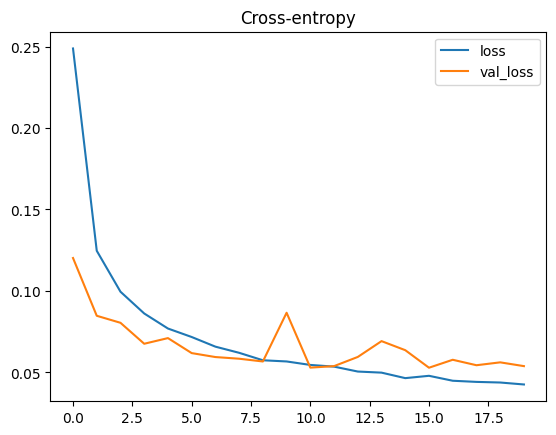

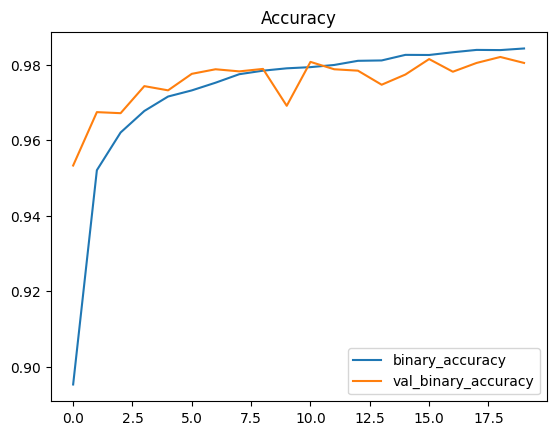

In [54]:
from matplotlib.pyplot import plot
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
